# Colab Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/Coding/idea/modules/
%cd runscr/

/content/drive/My Drive/Coding/idea/modules
/content/drive/My Drive/Coding/idea/modules/runscr


# Setup

## Import necessary libraries

In [3]:
# Import importlib to reload modules and sys and os to add the path for other imports
import importlib
import sys
import os
import torch

# Append the parent directory to the path to import the necessary modules
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Import the utilities and the dataloader
from utils import selfutil, inferutil, trainutil
from classes import SpreadsheetDataLoader, TestRNN

# Now reload the modules to ensure they are up-to-date
importlib.reload(selfutil)
importlib.reload(inferutil)
importlib.reload(trainutil)
importlib.reload(SpreadsheetDataLoader)
importlib.reload(TestRNN)

# Import the funcs needed from utils
from utils.selfutil import get_vocab2, create_embeddings
from utils.trainutil import train_model
from utils.inferutil import infer_one, infer_full

# Import the SpreadsheetDataLoader class
from classes.SpreadsheetDataLoader import SpreadsheetDataLoader
from classes.TestRNN import TestRNN

# Setup device as a global constant
devstr = "cuda:0" # "cpu"
gpu = False if (devstr == 'cpu') else True
DEVICE = 'cpu' if (devstr == 'cpu') else (torch.device(devstr if torch.cuda.is_available() else 'cpu') if devstr else torch.cuda.current_device())
print(DEVICE)

cuda:0


## Files

In [4]:
# Define the directory for training/validation/testing
train_dir = '../data/train_small/'
val_dir = '../data/val_small/'
test_dir = '../data/test_small/'

# Get the valid file paths
train_files = [os.path.join(train_dir, filename) for filename in os.listdir(train_dir)
        if filename.lower().endswith(('.xls', '.xlsx', '.csv')) and os.path.isfile(os.path.join(train_dir, filename))
    ]
val_files = [os.path.join(val_dir, filename) for filename in os.listdir(val_dir)
        if filename.lower().endswith(('.xls', '.xlsx', '.csv')) and os.path.isfile(os.path.join(val_dir, filename))
    ]
test_files = [os.path.join(test_dir, filename) for filename in os.listdir(test_dir)
        if filename.lower().endswith(('.xls', '.xlsx', '.csv')) and os.path.isfile(os.path.join(test_dir, filename))
    ]

# Observe length
print(f'Train/Val/Test : {len(train_files)}/{len(val_files)}/{len(test_files)}')

Train/Val/Test : 200/25/25


## Vocab and Embeddings

Get the vocabulary object from the helper function as well as the processed file paths.

In [5]:
# Train vocab using training files from largest dataset with fixed size of 50000
vocab_dir = '../data/train_big/'
spreadsheet_vocab = get_vocab2(vocab_dir, 50000)

# Create the embeddings for each word in the vocabulary and view info
spreadsheet_wvs = create_embeddings(spreadsheet_vocab)
print(f'Word Embeddings Shape: {spreadsheet_wvs.shape}')

Processing Files: 100%|██████████| 799/799 [03:08<00:00,  4.23it/s]


799(P) = 799(G) + 0(E)
Unique Tokens: 140363
Vocab Size: 50000
[==================================================] 100.0% 66.0/66.0MB downloaded


100%|██████████| 50000/50000 [00:00<00:00, 56414.45it/s]


Word Embeddings Shape: torch.Size([50000, 50])


## Data Loader

In [6]:
train_loader = SpreadsheetDataLoader(train_files, spreadsheet_vocab)
val_loader = SpreadsheetDataLoader(val_files, spreadsheet_vocab)
test_loader = SpreadsheetDataLoader(test_files, spreadsheet_vocab)

print(f'Training Files Processed: {len(train_loader)}')
print(f'Validation Files Processed: {len(val_loader)}')
print(f'Testing Files Processed: {len(test_loader)}')

Processing files: 100%|██████████| 25/25 [00:11<00:00,  2.11it/s]


Training Files Processed: 200
Validation Files Processed: 25
Testing Files Processed: 25


# Training

In [7]:
# Define the params
rnn_layers = 2; hidden_dim = 100

# Define the model
untrained_model = TestRNN(hidden_dim, rnn_layers, spreadsheet_wvs).to(DEVICE)

# Call the function to train the model
trained_model = train_model(
    untrained_model, train_loader, val_loader, DEVICE,
    batch_size=32, lr=5.6e-5, mu=0.25, max_epochs=20, patience=2,
    save_int=4, save_dir='../models/', save_name = 'colrnn_normal_small'
)

Epoch 0


Validation Processing: 100%|██████████| 1/1 [00:08<00:00,  8.61s/it]


Train Loss: 822.6295601981027, Perplexity: 1.002574024502821
Val Loss: 751.24365234375, Perplexity: 1.002350394269665


Epoch 1


Validation Processing: 100%|██████████| 1/1 [00:08<00:00,  8.55s/it]


Train Loss: 648.659162248884, Perplexity: 1.0020291157568029
Val Loss: 616.5106201171875, Perplexity: 1.0019284527657597


Epoch 2


Validation Processing: 100%|██████████| 1/1 [00:08<00:00,  8.62s/it]


Train Loss: 532.0484357561384, Perplexity: 1.0016640343328733
Val Loss: 518.1900024414062, Perplexity: 1.0016206556027458


Epoch 3


Validation Processing: 100%|██████████| 1/1 [00:08<00:00,  8.62s/it]


Train Loss: 437.24901035853793, Perplexity: 1.0013673371115022
Val Loss: 432.12139892578125, Perplexity: 1.0013512915444136

Model Saved

Epoch 4


Validation Processing: 100%|██████████| 1/1 [00:08<00:00,  8.58s/it]


Train Loss: 355.37191336495533, Perplexity: 1.0011111541040674
Val Loss: 355.0382385253906, Perplexity: 1.0011101102120998


Epoch 5


Validation Processing: 100%|██████████| 1/1 [00:08<00:00,  8.65s/it]


Train Loss: 282.96840122767856, Perplexity: 1.000884667341351
Val Loss: 285.4449768066406, Perplexity: 1.000892413516715


Epoch 6


Validation Processing: 100%|██████████| 1/1 [00:08<00:00,  8.62s/it]


Train Loss: 219.5240195138114, Perplexity: 1.0006862479214145
Val Loss: 220.9650421142578, Perplexity: 1.0006907542174959


Epoch 7


Validation Processing: 100%|██████████| 1/1 [00:08<00:00,  8.59s/it]


Train Loss: 165.47799246651786, Perplexity: 1.0005172524553967
Val Loss: 161.2593536376953, Perplexity: 1.0005040624769337

Model Saved

Epoch 8


Validation Processing: 100%|██████████| 1/1 [00:08<00:00,  8.65s/it]


Train Loss: 123.83304159981864, Perplexity: 1.0003870531407437
Val Loss: 105.87008666992188, Perplexity: 1.0003308987557626


Epoch 9


Validation Processing: 100%|██████████| 1/1 [00:08<00:00,  8.57s/it]


Train Loss: 102.1616962977818, Perplexity: 1.000319306268328
Val Loss: 76.38720703125, Perplexity: 1.0002387385154772


Epoch 10


Validation Processing: 100%|██████████| 1/1 [00:08<00:00,  8.62s/it]


Train Loss: 99.21526336669922, Perplexity: 1.0003100957677764
Val Loss: 69.82199096679688, Perplexity: 1.0002182175277528


Epoch 11


Validation Processing: 100%|██████████| 1/1 [00:08<00:00,  8.56s/it]


Train Loss: 98.32489122663226, Perplexity: 1.0003073124958963
Val Loss: 64.64301300048828, Perplexity: 1.0002020298209024

Model Saved

Epoch 12


Validation Processing: 100%|██████████| 1/1 [00:08<00:00,  8.63s/it]


Train Loss: 97.73638807024274, Perplexity: 1.0003054728600542
Val Loss: 60.755062103271484, Perplexity: 1.0001898775935414


Epoch 13


Validation Processing: 100%|██████████| 1/1 [00:08<00:00,  8.74s/it]


Train Loss: 97.10569218226841, Perplexity: 1.0003035013352832
Val Loss: 60.715110778808594, Perplexity: 1.0001897527219543


Epoch 14


Validation Processing: 100%|██████████| 1/1 [00:08<00:00,  8.71s/it]


Train Loss: 96.5792737688337, Perplexity: 1.0003018557798176
Val Loss: 60.8106803894043, Perplexity: 1.0001900514337028


Epoch 15


Validation Processing: 100%|██████████| 1/1 [00:08<00:00,  8.72s/it]

Train Loss: 96.05635397774833, Perplexity: 1.0003002211635361
Val Loss: 60.944244384765625, Perplexity: 1.0001904689006005


EARLY STOPPING at epoch 15, best epoch 13
Train Loss = 97.10569218226841, Perplexity = 1.0003035013352832
Val Loss = 60.715110778808594, Perplexity = 1.0001897527219543
Model Saved


TRAINING DONE at epoch 15, best epoch 13
Train Loss = 97.10569218226841, Perplexity = 1.0003035013352832
Val Loss = 60.715110778808594, Perplexity = 1.0001897527219543


# Evaluation

In a 100x100 spreadsheet where each **cell** is&nbsp; **(0 = NON-BOLD)**&nbsp;or&nbsp;**(1 = BOLD)**, suppose the NON-BOLD/BOLD ratio of cells in **Actual = (9882 / 118)** and **Predicted = (7300 / 2700)**.
<br><br>
- **All Positives (AP) :**  &nbsp;&nbsp;&nbsp;&nbsp; Total BOLD cells in **Actual Data** = **✅ TP + ❌ FN** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; = &nbsp;&nbsp;&nbsp;&nbsp; 118
  - **✅ True Positives (TP) :**  &nbsp;&nbsp;&nbsp;&nbsp; BOLD cells **CORRECTLY PREDICTED** as BOLD &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; = &nbsp;&nbsp;&nbsp;&nbsp; 118

  - **❌ False Negatives (FN) :**  &nbsp;&nbsp; BOLD cells **INCORRECTLY PREDICTED** as NON-BOLD &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; = &nbsp;&nbsp;&nbsp;&nbsp; 0
- **All Negatives (AN) :**  &nbsp;&nbsp;&nbsp;&nbsp; Total NON-BOLD cells in **Actual Data** = **✅ TN + ❌ FP** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; = &nbsp;&nbsp;&nbsp;&nbsp; 9882
  - **✅ True Negatives (TN) :** &nbsp;&nbsp;&nbsp;&nbsp;NON-BOLD cells **CORRECTLY PREDICTED** as NON-BOLD &nbsp;&nbsp; = &nbsp;&nbsp;&nbsp;&nbsp; 7300

  - **❌ False Positives (FP) :**  &nbsp;&nbsp;&nbsp;&nbsp; NON-BOLD cells **INCORRECTLY PREDICTED** as BOLD &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; = &nbsp;&nbsp;&nbsp;&nbsp; 2582
<br>

Now understand what the metrics **Accuracy, Precision, Recall, F1-Score** would represent
<br><br>
**1. Accuracy :**&nbsp;&nbsp;&nbsp;Proportion of **✅ CORRECTLY PREDICTED** cells (BOLD and NON-BOLD) out of TOTAL CELLS in spreadsheet

<div align="center">
$\frac{\text{TP + TN}}{\text{Total Cells}}\times100\quad=\quad\frac{118 + 7300}{10000}\times100\quad=\quad74.18\%$
</div>

The model correctly classifies 74.18% of cells (7418/10000) as BOLD or NON-BOLD. However, this metric is misleading for judging performance. With a highly imbalanced ratio of NON-BOLD to BOLD cells (9882 to 118), high accuracy could be achieved by simply predicting most cells as NON-BOLD, resulting in a majority correct classification, even if performance on BOLD cells is poor.
<br><br>
**2. Precision :**&nbsp;&nbsp;&nbsp;Proportion of cells **PREDICTED AS BOLD** that are **ACTUALLY BOLD**

<div align="center">
$\frac{\text{TP}}{\text{TP + FP}}\times100\quad=\quad\frac{118}{118 + 2582}\times100\quad=\quad4.37\%$
</div>

Precision of 4.37% means that, out of all cells predicted as BOLD by the model, only 4.37% were actually BOLD in the ground truth. This metric is useful for understanding how accurate the model’s BOLD predictions are. Low precision indicates a high number of **❌ False Positives**, meaning the model frequently predicts cells as BOLD even when they are actually NON-BOLD.

<br><br>
**3. Recall :**&nbsp;&nbsp;&nbsp;Proportion of **ACTUAL BOLD** cells that are **CORRECTLY PREDICTED** as BOLD

<div align="center">
$\frac{\text{TP}}{\text{TP + FN}}\times100\quad=\quad\frac{118}{118 + 0}\times100\quad=\quad100.0\%$
</div>

Recall of 100.0% means that the model correctly identifies 100% of all BOLD cells in the ground truth. This metric is important for understanding the model’s ability to detect BOLD cells. High recall indicates that the model is good at identifying most BOLD cells, though it may still produce **❌ False Positives** by predicting NON-BOLD cells as BOLD.

<br><br>
**4. F1-Score :**&nbsp;&nbsp;&nbsp;Harmonic mean of Precision and Recall, balancing both metrics to provide a single measure of performance. Scores closer to **0.0** indicate poor performance while **0.5 to 0.8** is average, and **above 0.9** is excellent.

<div align="center">
$2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision + Recall}}\quad=\quad2 \times \frac{0.0437 \times 1.0}{0.0437 + 1.0}\quad=\quad0.08$
</div>

An F1-Score of **0.08** indicates a very low balance between the model’s Precision and Recall, suggesting that the model struggles significantly with BOLD cell detection. In this example, the F1-Score shows that the model’s performance on BOLD cell detection is poor, largely due to the very low Precision (high False Positives).


In [ ]:
# # Setup from preloaded state if want to
# # Define params common for both models
# hidden_state_dim = 100
# rnn_layers = 2

# # Define CrossRNN Model
# untrained_model = CrossRNN(hidden_state_dim, rnn_layers, spreadsheet_wvs)

# # Load the state_dict from the saved file
# trained_state_dict = torch.load('../models/rnn_cross_big_20241106_034421.pth')

# # Load the weights into the model
# untrained_model.load_state_dict(trained_state_dict)

# # Move the model to GPU
# trained_model = untrained_model.to(DEVICE)

## Single Example


Filename: ../data/train_small/michelle_lokay_000_1_2_1.pst.243.xls


NB to B ratio: Predicted = 0:10000 | Actual = 10000:0
Accuracy: 0.00% | Precision: 0.00% | Recall: 0.00% | F1-Score: 0.00



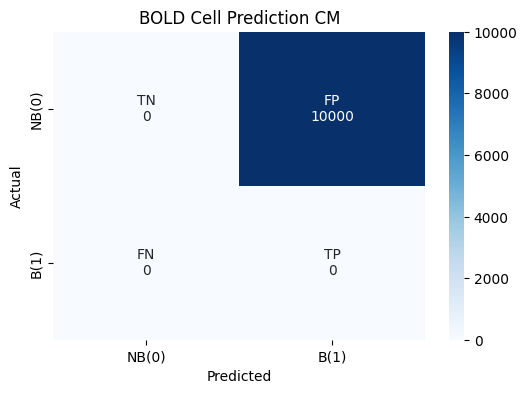


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
96,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
97,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
98,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
infer_one(trained_model, train_loader, 0)


Filename: ../data/val_small/40%2520Lakes%2520East%2520UnmixO%2520SciHub%2520-%2520Published.xlsx


NB to B ratio: Predicted = 0:10000 | Actual = 10000:0
Accuracy: 0.00% | Precision: 0.00% | Recall: 0.00% | F1-Score: 0.00



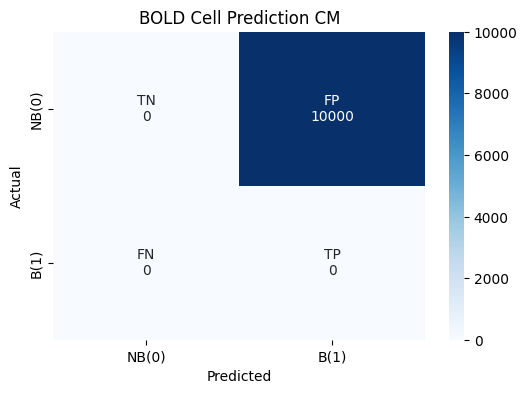


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
96,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
97,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
98,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
infer_one(trained_model, val_loader, 0)


Filename: ../data/test_small/FarrajAimen_A-dv4m_All%2520Data_August-17-2020.xlsx


NB to B ratio: Predicted = 0:10000 | Actual = 10000:0
Accuracy: 0.00% | Precision: 0.00% | Recall: 0.00% | F1-Score: 0.00



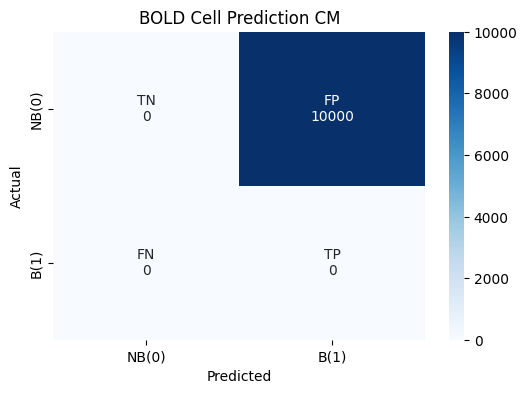


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
96,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
97,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
98,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
infer_one(trained_model, test_loader, 0)

## All Examples

Processing files: 100%|██████████| 200/200 [26:05<00:00,  7.83s/it]


--- Average Metrics Across All Files ---

Total Files Processed: 200

NB to B ratio: Predicted = 90000:1910000 | Actual = 1992194:7806
Accuracy: 4.85% | Precision: 0.37% | Recall: 64.50% | F1-Score: 0.01



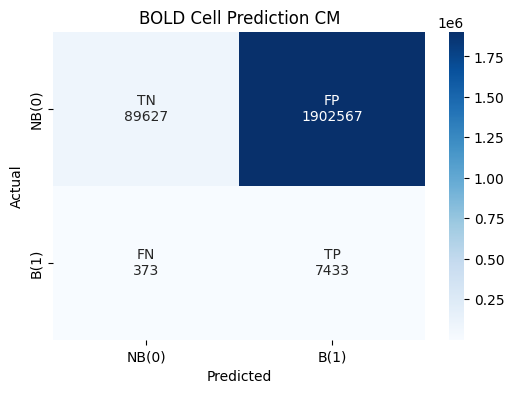

In [11]:
infer_full(trained_model, train_loader, is_subset = False)

Processing files: 100%|██████████| 25/25 [03:15<00:00,  7.80s/it]


--- Average Metrics Across All Files ---

Total Files Processed: 25

NB to B ratio: Predicted = 0:250000 | Actual = 248904:1096
Accuracy: 0.44% | Precision: 0.44% | Recall: 72.00% | F1-Score: 0.01



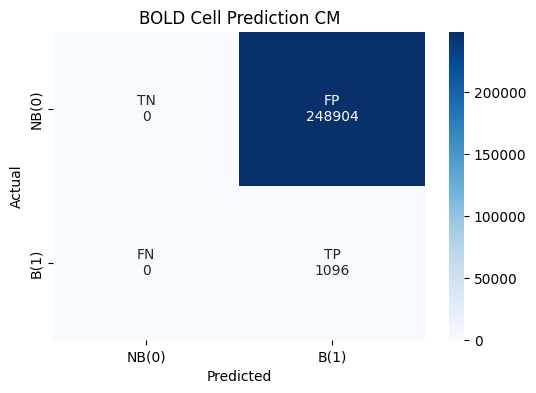

In [12]:
infer_full(trained_model, val_loader, is_subset = False)

Processing files: 100%|██████████| 25/25 [03:15<00:00,  7.80s/it]


--- Average Metrics Across All Files ---

Total Files Processed: 25

NB to B ratio: Predicted = 0:250000 | Actual = 249323:677
Accuracy: 0.27% | Precision: 0.27% | Recall: 60.00% | F1-Score: 0.01



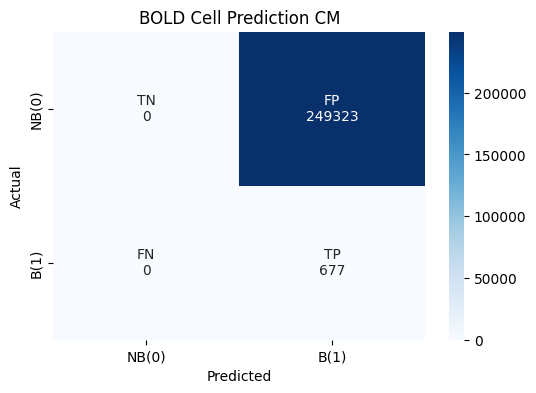

In [13]:
infer_full(trained_model, test_loader, is_subset = False)